Experimenting and re-implementing different activation functions. 

In [61]:
import torch
import torch.nn as nn
import numpy as np
import torch.nn.functional as F

from utils.plots import linear_plot

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
# Global input tensor to experiment with it the activation functions
input_tensor = torch.linspace(-10, 10, steps=100)
print(f"<<input tensor>> min: {input_tensor.min()}, max: {input_tensor.max()}")

<<input tensor>> min: -10.0, max: 10.0


#### ReLU (Rectified Linear Unit)

The ReLU activation function is used to **introduce nonlinearity** in a neural network, **helping mitigate the vanishing gradient problem** during machine learning model training and enabling neural networks to learn more complex relationships in data.

If a model input is positive, the ReLU function outputs the same value. **If a model input is negative, the ReLU function outputs zero**.

<<output tensor>> min: 0.0, max: 10.0


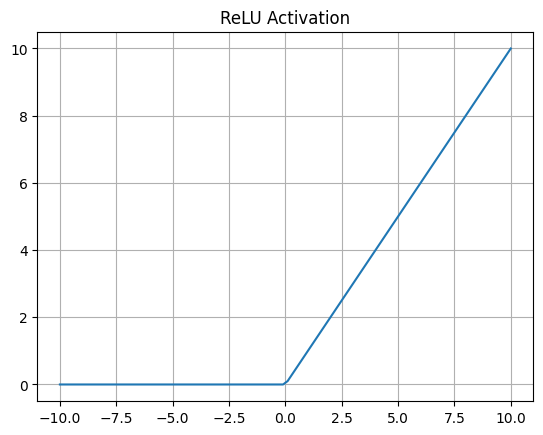

In [24]:
# Similar to np.maximum(0, x), where x is numpy.ndarray
relu_layer = nn.ReLU()

output_tensor = relu_layer(input_tensor)
print(f"<<output tensor>> min: {output_tensor.min()}, max: {output_tensor.max()}")

# Plot the function
linear_plot(input_tensor, output_tensor, "ReLU Activation")

#### Leaky ReLU

The negative section of Leaky ReLU allows a small gradient instead of being completely zero, helping to reduce the risk of overfitting in neural networks. In other words, instead of returning zero for negative inputs it allows a small, non-zero value. It introduces a slight modification to the standard ReLU by assigning a small, fixed slope to the negative part of the input. This ensures that neurons don't become inactive during training as they can still pass small gradients even when receiving negative values.

Leaky ReLU can be more effective than ReLU for regression tasks, especially when the output range is not restricted to positive values since it can provide both positive and negative output values.

<<output tensor>> min: -0.09999999403953552, max: 10.0


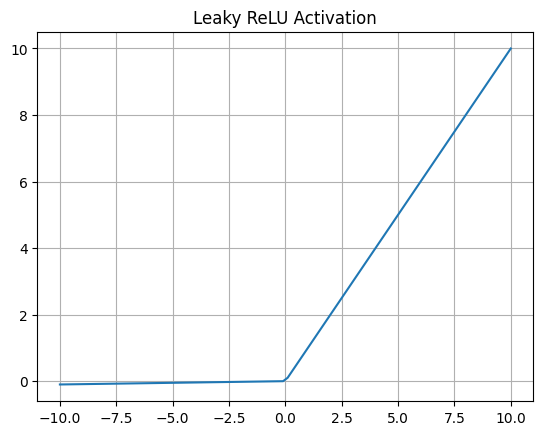

In [31]:
# Similar to np.where(x > 0, x, alpha * x)
leakyrelu_layer = nn.LeakyReLU()

output_tensor = leakyrelu_layer(input_tensor)
print(f"<<output tensor>> min: {output_tensor.min()}, max: {output_tensor.max()}")

# Plot the function
linear_plot(input_tensor, output_tensor, "Leaky ReLU Activation")

#### Sigmoid

A mathematical function that transforms a continuous real number into a range of (0, 1). If we use a linear activation function in a neural network, the model will only be able to separate data linearly, which results in poor performance on non-linear datasets. However, by adding a hidden layer with a sigmoid activation function, the model gains the ability to handle non-linearity, thereby improving performance.

One key issue with using the sigmoid function is the vanishing gradient problem. When updating weights and biases using gradient descent, if the gradients are too small, the updates to weights and biases become insignificant, slowing down or even stopping learning.

Mathematical form: σ(x) = 1 / (1 + exp(-x))

<<output tensor>> min: 4.539787187241018e-05, max: 0.9999545812606812


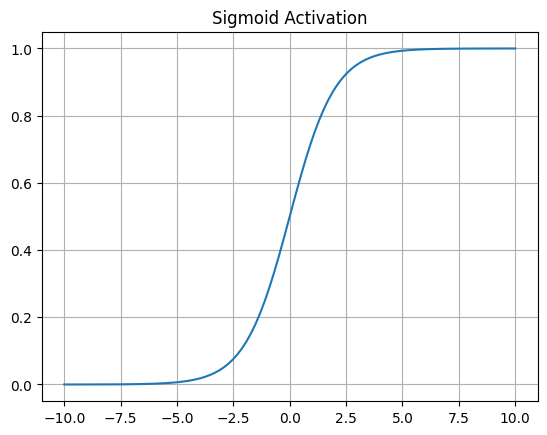

In [27]:
# Similar to 1 / (1 + np.exp(-x))
sigmoid_layer = torch.sigmoid

output_tensor = sigmoid_layer(input_tensor)
print(f"<<output tensor>> min: {output_tensor.min()}, max: {output_tensor.max()}")

# Plot the function
linear_plot(input_tensor, output_tensor, "Sigmoid Activation")

#### Tanh

Tanh (hyperbolic tangent) transforms its input into a value between -1 and 1. It introduces non-linearity to the model, which allows neural networks to learn complex patterns and relationships in the data. Without non-linear activation functions, a neural network would essentially behave as a linear model, no matter how many layers it has. Tanh helps mitigate the vanishing gradient problem (to some extent), especially when compared to sigmoid activation. This is because the gradient of the tanh function is generally higher than that of the sigmoid, enabling better weight updates during backpropagation.

<<output tensor>> min: -1.0, max: 1.0


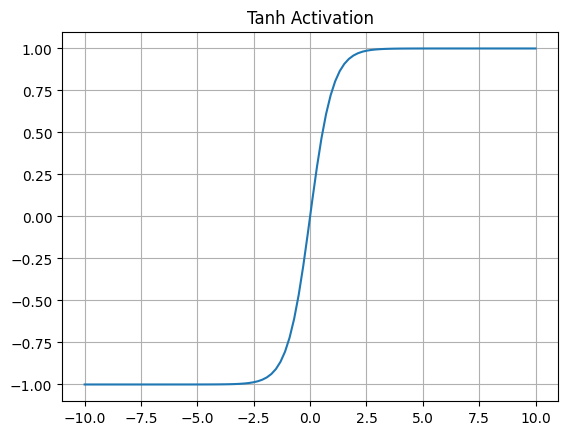

In [29]:
tanh_layer = torch.tanh

output_tensor = tanh_layer(input_tensor)
print(f"<<output tensor>> min: {output_tensor.min()}, max: {output_tensor.max()}")

# Plot the function
linear_plot(input_tensor, output_tensor, "Tanh Activation")

#### Softmax

The softmax activation function transforms the raw outputs of the neural network into a vector of probabilities, essentially a probability distribution over the input classes. Consider a multiclass classification problem with N classes.

It takes an input of logit (the output of the previous layer in the network) for the i^{th}class. It is ideal for problems involving more than two classes, where the goal is to predict a single class out of many. The function's ability to generate a probability distribution over classes makes it particularly useful in classification models. The probabilities for all classes output of the softmax sum up to 1.

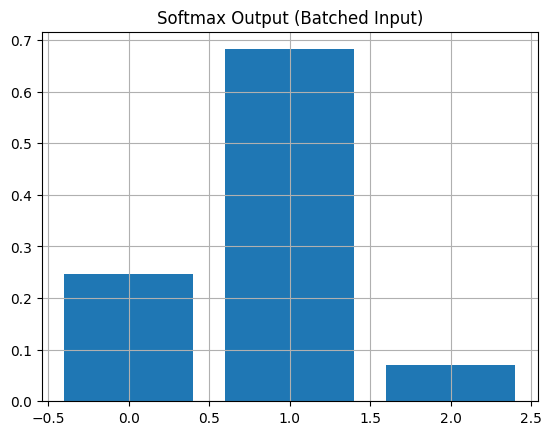

In [66]:
# def softmax(logits):
#     exp_logits = np.exp(logits - np.max(logits, axis=1, keepdims=True))  # Numerical stability improvement
#     return exp_logits / np.sum(exp_logits, axis=1, keepdims=True)

# Create a batched input tensor of shape [1, 3]
input_tensor_softmax = torch.randn(1, 3)

# Apply softmax along dim=1 (logits)
output_tensor_softmax = F.softmax(input_tensor_softmax, dim=1)

# Convert to numpy and remove the batch dimension for plotting
output_values = output_tensor_softmax.squeeze(0).numpy()

# Plotting
plt.bar(range(len(output_values)), output_values)
plt.title("Softmax Output (Batched Input)")
plt.grid(True)
plt.show()